## Nutrition Analysis and Total Calorie Prediction

#### Sharven Rane 2001 1112

 ### Abstract 
 #### In this project, based on numerous variables, we hope to create a machine learning model that can predict total calories in a menu listed item. With the expanding trend of fitness app development and the growing number of people adopting solo workout routines, there is a greater demand for good eating plans and conscious eating to preserve overall well-being. We will be working with a popular company’s nutrition data set to Explore, Analyse and find Meaningful insights.



### Introduction
#### Based on numerous variables, we hope to create a machine learning model that can predict total calories in a menu listed item. With the expanding trend of fitness app development and the growing number of people adopting solo workout routines, there is a greater demand for good eating plans and conscious eating to preserve overall well-being. 
#### To find the total calories we are consuming, we used the Chipotle Nutrition dataset, which includes information like Menu Type, Menu Category, Sodium, Cholesterol, Trans Fat, Carbohydrates, Protein and Fats consumed. To examine the dataset, we use parametric tests. ANOVA analysis is used to determine whether the means are the same across numerous samples, and ad hoc analysis is used to determine which subset groups have different means. In addition, the Chi-square test was used to determine the relationship between categorical features. 
#### Regressions are used to predict the total calories of the food items to have an estimate of our energy intake in the form of calories.


### Dataset
#### Chipotle Mexican Grill, Inc., also known simply as Chipotle, is an American fast casual restaurant company with locations in the United States, United Kingdom, Canada, Germany, and France that specializes on bowls, tacos, and Mission burritos created to order in front of the customer. 
#### Despite the vast number of choices offered at fast food restaurants, some of which are healthier than others, the calories, portion sizes and sodium content overall have worsened (increased) over time and remain high. 
#### This creates a need to know our calorie consumption when eating outside to maintain wellness and consume food to maintain a healthy body fat level and BMI. 
#### We will be working with Chipotle Nutrition Data Set to Explore, Analyse and find Meaningful insights. 



### Methodology
#### Since rows are more than 30 in this dataset and the mean of the columns are normally distributed according to Central Limit Theorem.


#### Test Involved:

#### 1.	Z Test (Comparing Two Samples)
#### The z-test is a statistical hypothesis test used to determine whether two population means are different when the variances are known and the sample size is large (typically, n ≥ 30).
#### 2.	F Test (Comparing Two or more Samples)
#### The F-test is typically used in analysis of variance (ANOVA) to determine whether the means of two or more populations are equal.

#### 3.	Tukey Test (Post Hoc Test)
#### The Tukey test allows us to identify which groups have significantly different means, while controlling for the familywise error rate (the probability of making at least one false positive error when conducting multiple tests).

#### 4.	Chi Square Test (Categorical Variables comparison)
#### The chi-square test of independence is a statistical test used to determine whether there is a significant association between two categorical variables.

#### 5.	Linear Regression
#### #### Linear regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables. It involves fitting a linear equation to a set of data points and using this equation to make predictions about the values of the dependent variable based on the values of the independent variables.

#### 6.	Feature Selection
#### •	Forward Selection
#### The forward selection algorithm starts with an empty model and sequentially adds predictor variables that improve the model fit the most, until no more statistically significant predictors are available to be added to the model.

#### •	Backward Selection
#### The backward selection algorithm starts with a model that includes all predictor variables and sequentially removes the variable that contributes the least to the model fit, until no more statistically insignificant variables are available to be removed from the model.
#### 7.	Regularization
#### •	Ridge Regression
#### Ridge regression is a linear regression technique that adds a penalty term to the ordinary least squares equation to handle multicollinearity in a dataset. The penalty term shrinks the coefficients of highly correlated predictors towards zero. The degree of shrinkage is controlled by a tuning parameter, lambda. Ridge regression can improve model accuracy by reducing the variance of estimates.
#### •	Lasso Regression
#### Lasso regression is a linear regression technique that adds a penalty term to the ordinary least squares equation to perform variable selection and handle multicollinearity. The penalty term encourages sparse solutions by shrinking some coefficients to exactly zero. The degree of sparsity is controlled by a tuning parameter, alpha. Lasso regression can effectively select important predictors and improve model interpretability.

#### 8.	Principle Component Analysis
#### PCA works by identifying the linear combinations of the original variables that explain the most variance in the data. The first principal component captures the largest amount of variance, and each subsequent principal component captures the remaining variance in decreasing order.
#### 9.	Polynomial Regression
#### Polynomial regression is a type of linear regression that models the relationship between a dependent variable and one or more independent variables as an nth degree polynomial function. In polynomial regression, the relationship between the variables is not linear but can be approximated by a polynomial curve.
#### 10.	Resampling Methods
#### •	Cross Validation
#### In cross-validation, the original dataset is divided into two or more subsets. One subset is used to train the model, while the other subset(s) are used to test the model. The process is repeated multiple times, with different subsets used for training and testing, to obtain a more reliable estimate of the model's performance.
#### •	Bootstrapping
#### In bootstrapping, many resamples are drawn from the original dataset, each of the same size as the original dataset. The statistic of interest, such as the mean or standard deviation, is then computed for each resample.


In [1]:
import numpy as np

In [2]:
import scipy as sc

In [3]:
from scipy import stats

In [4]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
from fitter import Fitter, get_common_distributions, get_distributions

In [7]:
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv(r'C:\Users\sharv\Desktop\chipotle_usa_nutritions.csv')

In [9]:
df=pd.read_csv(r'C:\Users\sharv\Desktop\chipotle_usa_nutritions.csv')

In [10]:
data.head()

,Menu Type,Menu Category,Menu Item,Size Type,Per Serving Size,Total Calories (cal),Total Fat Calories (cal),Total Fats (g),Saturated Fats (g),Non-Saturated Fats (g),Trans Fats (g),Cholesterol (mg),Sodium (g),Carbohydrates (g),Dietary Fiber (g),Sugar (g),Protein (g)
0,Adult,Burrito,Tortilla,Regular,1 ea,320,80,9.0,0.5,8.5,0.0,0,600,0,3,0,8
1,Adult,Taco,Tortilla,Regular,1 ea,80,25,2.5,0.0,2.5,0.0,0,160,0,1,0,2
2,Adult,Toppings,Crispy Corn Tortilla,Regular,1 ea,70,25,3.0,0.5,2.5,0.0,0,0,0,1,0,1
3,Adult,Rice,Cilantro-Lime Brown Rice,Regular,4 oz,210,50,6.0,1.0,5.0,0.0,0,190,0,2,0,4
4,Adult,Rice,Cilantro-Lime White Rice,Regular,4 oz,210,35,4.0,0.5,3.5,0.0,0,350,0,1,0,4


In [11]:
data['Menu Category'].unique()

array(['Burrito', 'Taco', 'Toppings', 'Rice', 'Beans', 'Veggies',
       'Protein', 'Taco, Side', 'Side', 'Beverage', 'Quesidilla',
       'Side, Protein', 'Main, Protein', "Kid's Meal"], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
lb = LabelEncoder()

In [14]:
data['Menu Item'] = lb.fit_transform(data['Menu Item'])

In [15]:
data['Per Serving Size'] = lb.fit_transform(data['Per Serving Size'])

In [16]:
data['Menu Type'] = lb.fit_transform(data['Menu Type'])

In [17]:
data['Menu Category'] = lb.fit_transform(data['Menu Category'])

In [18]:
data['Size Type'] = lb.fit_transform(data['Size Type'])

In [19]:
data_scaled = StandardScaler().fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [20]:
data_scaled

,Menu Type,Menu Category,Menu Item,Size Type,Per Serving Size,Total Calories (cal),Total Fat Calories (cal),Total Fats (g),Saturated Fats (g),Non-Saturated Fats (g),Trans Fats (g),Cholesterol (mg),Sodium (g),Carbohydrates (g),Dietary Fiber (g),Sugar (g),Protein (g)
0,-0.660772,-0.679845,1.365973,-0.079640,-1.536771,0.989450,0.663780,0.668826,-0.226377,0.854170,-0.138622,-0.384917,2.190763,-0.738763,0.865106,-0.679054,0.825683
1,-0.660772,0.981094,1.365973,-0.079640,-1.536771,-0.605659,-0.121833,-0.160794,-0.393699,-0.008457,-0.138622,-0.384917,-0.102449,-0.738763,-0.044593,-0.679054,-0.207687
2,-0.660772,1.396329,-0.620661,-0.079640,-1.536771,-0.672122,-0.121833,-0.096977,-0.226377,-0.008457,-0.138622,-0.384917,-0.936344,-0.738763,-0.044593,-0.679054,-0.379915
3,-0.660772,0.358242,-0.951767,-0.079640,1.184594,0.258358,0.235264,0.285925,-0.059055,0.350971,-0.138622,-0.384917,0.053907,-0.738763,0.410257,-0.679054,0.136770
4,-0.660772,0.358242,-0.885546,-0.079640,1.184594,0.258358,0.021006,0.030657,-0.226377,0.135314,-0.138622,-0.384917,0.887802,-0.738763,-0.044593,-0.679054,0.136770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.513381,1.603947,0.836204,1.274236,-1.264634,-1.104131,-0.478930,-0.479878,-0.393699,-0.367885,-0.138622,-0.384917,-0.936344,-0.713001,-0.044593,-0.679054,-0.552144
98,1.513381,-0.472228,0.107772,1.274236,-1.536771,-0.904742,-0.478930,-0.479878,-0.393699,-0.367885,-0.138622,-0.384917,-0.936344,-0.506905,-0.044593,-0.502554,-0.379915
99,1.513381,-0.472228,-1.415315,1.274236,-1.536771,-1.004437,-0.478930,-0.479878,-0.393699,-0.367885,-0.138622,-0.384917,-0.936344,-0.609953,-0.044593,-0.603411,-0.379915
100,1.513381,-0.472228,1.697079,1.274236,-1.536771,-0.605659,-0.478930,-0.479878,-0.393699,-0.367885,-0.138622,-0.384917,-0.936344,-0.249285,0.865106,-0.326055,-0.379915


### Since rows are more than 30 in this dataset and the mean of the columns are normally distributed according to Central Limit Theorem.
### We want to compare the mean of two columns we will go for Z -test.

### Z-  Test
#### H0: mean of the two samples is equal
##### H1: mean of the two samples is not equal

In [21]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(data['Saturated Fats (g)'], data['Non-Saturated Fats (g)'], value=0) 

(-1.8351432634811717, 0.06648446508444447)

### Since p value > 0.05 we failed to reject H0 i.e The means are equal

In [22]:
ztest(data['Total Calories (cal)'], data['Trans Fats (g)'], value=0) 

(11.428704798627443, 3.005583755712495e-30)

### Since p value < 0.05 we reject H0 i.e The means are not equal

## F-test

#### H0: Mean of the samples are equal
#### H1 Mean of the samples are not equal

In [23]:
f,p = sc.stats.f_oneway(data.iloc[:, 5],
data.iloc[:, 6],
data.iloc[:, 7],
data.iloc[:, 8],
data.iloc[:, 9],
data.iloc[:, 10],
data.iloc[:, 11],
data.iloc[:, 12],
data.iloc[:, 13],
data.iloc[:, 14],
data.iloc[:, 15],
data.iloc[:, 16]
)
print(p)

5.431933266878706e-129


In [24]:
if p < 0.05:
	print('Reject Null Hypothesis (Mean of the samples is different)')
else:
	print('Do not Reject Null Hypothesis (Mean of the samples is equal)')

Reject Null Hypothesis (Mean of the samples is different)


#### Since we found out the means of the samples is different we go ahead and perform the Tukey test too identify which of the coloumns are actually not same.
#### Reject false means the two coloumns are same

## Tukey test
#### H0 : Difference of the mean of the two groups = 0
#### H1: Difference of the mean of the two groups is != 0

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data['Total Fat Calories (cal)'],
                          groups=data['Size Type'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   5.6739    0.9 -36.1515 47.4994  False
     0      2  -9.9677 0.8445 -55.2162 35.2807  False
     1      2 -15.6417  0.601 -54.7569 23.4736  False
-----------------------------------------------------


<Axes: xlabel='Total Fat Calories (cal)', ylabel='Count'>

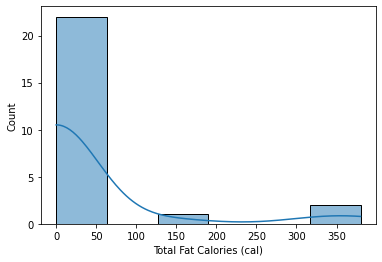

In [26]:
sns.histplot(data[data['Size Type']==0]['Total Fat Calories (cal)'], kde=True)

<Axes: xlabel='Total Fat Calories (cal)', ylabel='Count'>

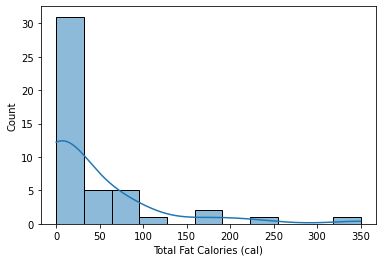

In [27]:
sns.histplot(data[data['Size Type']==1]['Total Fat Calories (cal)'], kde=True)

<Axes: xlabel='Total Fat Calories (cal)', ylabel='Count'>

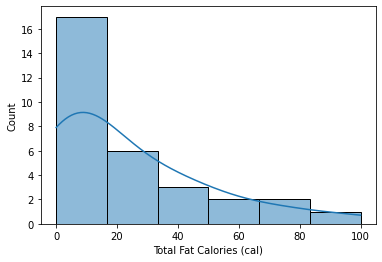

In [28]:
sns.histplot(data[data['Size Type']==2]['Total Fat Calories (cal)'], kde=True)

In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data['Total Fat Calories (cal)'],
                          groups=data['Menu Type'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1 -13.6438 0.3703 -43.7203 16.4328  False
-----------------------------------------------------


<Axes: xlabel='Total Fat Calories (cal)', ylabel='Count'>

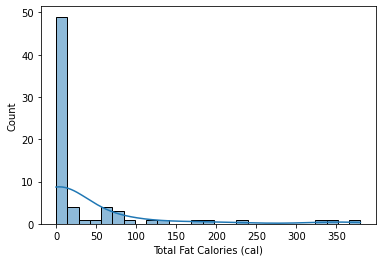

In [30]:
sns.histplot(data[data['Menu Type']==0]['Total Fat Calories (cal)'], kde=True)

<Axes: xlabel='Total Fat Calories (cal)', ylabel='Count'>

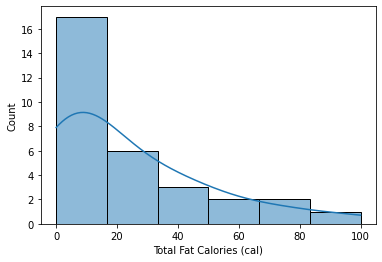

In [31]:
sns.histplot(data[data['Menu Type']==1]['Total Fat Calories (cal)'], kde=True)

#### After applying tukey to few column pairs we found out which coloums have same mean and we plot the graph for the same.

### Chi-square Test of independence

#### H0: (null hypothesis) The two variables are independent.

#### H1: (alternative hypothesis) The two variables are not independent

#### We use this on Categorical Coloumns only so we check between categorical variables only

In [32]:
df.head()

,Menu Type,Menu Category,Menu Item,Size Type,Per Serving Size,Total Calories (cal),Total Fat Calories (cal),Total Fats (g),Saturated Fats (g),Non-Saturated Fats (g),Trans Fats (g),Cholesterol (mg),Sodium (g),Carbohydrates (g),Dietary Fiber (g),Sugar (g),Protein (g)
0,Adult,Burrito,Tortilla,Regular,1 ea,320,80,9.0,0.5,8.5,0.0,0,600,0,3,0,8
1,Adult,Taco,Tortilla,Regular,1 ea,80,25,2.5,0.0,2.5,0.0,0,160,0,1,0,2
2,Adult,Toppings,Crispy Corn Tortilla,Regular,1 ea,70,25,3.0,0.5,2.5,0.0,0,0,0,1,0,1
3,Adult,Rice,Cilantro-Lime Brown Rice,Regular,4 oz,210,50,6.0,1.0,5.0,0.0,0,190,0,2,0,4
4,Adult,Rice,Cilantro-Lime White Rice,Regular,4 oz,210,35,4.0,0.5,3.5,0.0,0,350,0,1,0,4


In [33]:
crosstab = pd.crosstab(index=df['Menu Category'], columns=df['Size Type'])
crosstab

Size Type,Large,Regular,Small
Menu Category,,,
Beans,0,2,2
Beverage,22,21,0
Burrito,0,1,0
Kid's Meal,0,0,4
"Main, Protein",0,0,5
Protein,0,5,0
Quesidilla,0,0,1
Rice,0,2,2
Side,0,1,0


In [34]:
stats.chi2_contingency(crosstab)

(77.05386098698588,
 5.918472251427619e-07,
 26,
 array([[ 0.98039216,  1.80392157,  1.21568627],
        [10.53921569, 19.39215686, 13.06862745],
        [ 0.24509804,  0.45098039,  0.30392157],
        [ 0.98039216,  1.80392157,  1.21568627],
        [ 1.2254902 ,  2.25490196,  1.51960784],
        [ 1.2254902 ,  2.25490196,  1.51960784],
        [ 0.24509804,  0.45098039,  0.30392157],
        [ 0.98039216,  1.80392157,  1.21568627],
        [ 0.24509804,  0.45098039,  0.30392157],
        [ 1.2254902 ,  2.25490196,  1.51960784],
        [ 0.49019608,  0.90196078,  0.60784314],
        [ 0.24509804,  0.45098039,  0.30392157],
        [ 4.90196078,  9.01960784,  6.07843137],
        [ 1.47058824,  2.70588235,  1.82352941]]))

#### The way to interpret the output is as follows:

#### Chi-Square Test Statistic: 77.05 p-value:5.918e-07 Degrees of freedom: 26 Array: dispalyed above

#### Since the p-value (5.918e-07) of the test is less than 0.05, we reject the null hypothesis.

##### This means we do have sufficient evidence to say that there is an association between Menu Category and Size Type preference.


### Linear Regression

In [35]:
X = data.drop('Total Calories (cal)', axis = 1)
y = data[['Total Calories (cal)']] 

In [36]:
X.shape

(102, 16)

In [37]:
X.head()

,Menu Type,Menu Category,Menu Item,Size Type,Per Serving Size,Total Fat Calories (cal),Total Fats (g),Saturated Fats (g),Non-Saturated Fats (g),Trans Fats (g),Cholesterol (mg),Sodium (g),Carbohydrates (g),Dietary Fiber (g),Sugar (g),Protein (g)
0,0,2,45,1,2,80,9.0,0.5,8.5,0.0,0,600,0,3,0,8
1,0,10,45,1,2,25,2.5,0.0,2.5,0.0,0,160,0,1,0,2
2,0,12,15,1,2,25,3.0,0.5,2.5,0.0,0,0,0,1,0,1
3,0,7,10,1,12,50,6.0,1.0,5.0,0.0,0,190,0,2,0,4
4,0,7,11,1,12,35,4.0,0.5,3.5,0.0,0,350,0,1,0,4


In [38]:
y.head()

,Total Calories (cal)
0,320
1,80
2,70
3,210
4,210


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
X_train.shape

(68, 16)

In [41]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [42]:
pred = LR.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,pred)
print('R2 score is',score)
print('Mean squared error is ==',mean_squared_error(y_test,pred))
print('Root mean squared error is ==',np.sqrt(mean_squared_error(y_test,pred)))

R2 score is 0.6105329583477983
Mean squared error is == 7021.971158221217
Root mean squared error is == 83.79720256799278


### Forward Selection

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((68, 16), (34, 16), (68, 1), (34, 1))

In [46]:
rmse_frwd = []
r2score_frwd = []
mse_frwd = []

for i in range(10, 17):
    features_selector_forward = sfs(LinearRegression(),
                k_features=i, 
                forward=True, 
                verbose=0, 
                scoring='neg_mean_squared_error')

    features_selector_forward.fit(x_train, y_train)

    X_fs = X[list(features_selector_forward.k_feature_names_)]

    X_train, X_test, Y_train, Y_test = train_test_split(X_fs, y, test_size=0.33, random_state=42)

    model = LinearRegression().fit(X_train,Y_train)

    Y_pred = model.predict(X_test)
    
    rmse_frwd.append(np.sqrt(mean_squared_error(Y_test,Y_pred)))
    r2score_frwd.append(r2_score(Y_test, Y_pred))
    mse_frwd.append(mean_squared_error(Y_test,Y_pred))

    print("For {} features, RMSE = {}".format(i, np.sqrt(mean_squared_error(Y_test,Y_pred))))
    print("For {} features, R2score = {}".format(i, r2_score(Y_test, Y_pred)))
    print("For {} features, MSE = {}".format(i, mean_squared_error(Y_test,Y_pred)))
    print()
    
print('- - - - - - - - - - - -')
print("Mean RMSE = ", (sum(rmse_frwd) / len(rmse_frwd)))
print("Mean R2 = ", (sum(r2score_frwd) / len(r2score_frwd)))
print("Mean MSE =", (sum(mse_frwd)/len(mse_frwd)))

For 10 features, RMSE = 103.27545400320442
For 10 features, R2score = 0.40843033462434764
For 10 features, MSE = 10665.81939956799

For 11 features, RMSE = 102.53009307544811
For 11 features, R2score = 0.41693848916157783
For 11 features, MSE = 10512.419986060051

For 12 features, RMSE = 95.6973109253303
For 12 features, R2score = 0.49206149179612746
For 12 features, MSE = 9157.975318339342

For 13 features, RMSE = 84.33348025052764
For 13 features, R2score = 0.6055320560355886
For 13 features, MSE = 7112.135891166136

For 14 features, RMSE = 87.4811072533216
For 14 features, R2score = 0.5755366347101472
For 14 features, MSE = 7652.944126267156

For 15 features, RMSE = 83.79720256799308
For 15 features, R2score = 0.6105329583477956
For 15 features, MSE = 7021.971158221266

For 16 features, RMSE = 83.79720256799278
For 16 features, R2score = 0.6105329583477983
For 16 features, MSE = 7021.971158221217

- - - - - - - - - - - -
Mean RMSE =  91.55883580625971
Mean R2 =  0.531366417574769
Me

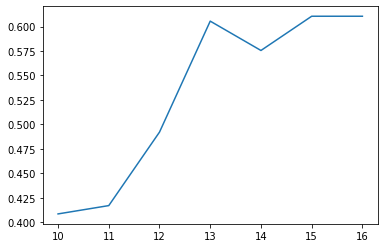

In [47]:
import matplotlib.pyplot as plt

features = [x for x in range(10,17)]

plt.plot(features, r2score_frwd)
plt.show()
# Make sure to close the plt object once done
#plt.close()

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

features_selector_forward = sfs(LinearRegression(),
                k_features=16, 
                forward=True, 
                verbose=0, 
                scoring='neg_mean_squared_error')

features_selector_forward.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(16, 16),
                          scoring='neg_mean_squared_error')

In [49]:
features_selector_forward.k_feature_names_

('Menu Type',
 'Menu Category',
 'Menu Item',
 'Size Type',
 'Per Serving Size',
 'Total Fat Calories (cal)',
 'Total Fats (g)',
 'Saturated Fats (g)',
 'Non-Saturated Fats (g)',
 'Trans Fats (g)',
 'Cholesterol (mg)',
 'Sodium (g)',
 'Carbohydrates (g)',
 'Dietary Fiber (g)',
 'Sugar (g)',
 'Protein (g)')

In [50]:
X_train_frwd = x_train[list(features_selector_forward.k_feature_names_)]
X_train_frwd.shape

(68, 16)

In [51]:
model_frwd = LinearRegression().fit(X_train_frwd,y_train)

In [52]:
X_test_frwd = x_test[list(features_selector_forward.k_feature_names_)]

In [53]:
y_pred_frwd = model_frwd.predict(X_test_frwd)
    
rmse = np.sqrt(mean_squared_error(y_test,y_pred_frwd))
r2score = r2_score(y_test, y_pred_frwd)
mse = mean_squared_error(Y_test,Y_pred)

print('RMSE = ', rmse)
print('R2 score = ', r2score)
print('MSE =', mse)

RMSE =  83.79720256799278
R2 score =  0.6105329583477983
MSE = 7021.971158221217


### Backward Selection

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
rmse_bkwd = []
r2score_bkwd = []
mse_bkwd = []

for i in range(10, 17):
    
    features_selector_backward = sfs(LinearRegression(),
                k_features=i, 
                forward=False, 
                verbose=0, 
                scoring='neg_mean_squared_error')

    features_selector_backward.fit(x_train, y_train)

    X_bs = X[list(features_selector_backward.k_feature_names_)]

    X_train, X_test, Y_train, Y_test = train_test_split(X_bs, y, test_size=0.2, random_state=42)

    model = LinearRegression().fit(X_train,Y_train)

    Y_pred = model.predict(X_test)
    
    rmse_bkwd.append(np.sqrt(mean_squared_error(Y_test,Y_pred)))
    r2score_bkwd.append(r2_score(Y_test, Y_pred))

    print("For {} features, RMSE = {}".format(i, np.sqrt(mean_squared_error(Y_test,Y_pred))))
    print("For {} features, R2score = {}".format(i, r2_score(Y_test, Y_pred)))
    
    print()
    
print('- - - - - - - - - - - -')
print("Mean RMSE = ", (sum(rmse_bkwd) / len(rmse_bkwd)))
print("Mean R2 = ", (sum(r2score_bkwd) / len(r2score_bkwd)))

For 10 features, RMSE = 53.98478974033155
For 10 features, R2score = 0.8604692525562916

For 11 features, RMSE = 53.98478974033156
For 11 features, R2score = 0.8604692525562916

For 12 features, RMSE = 54.04166959859107
For 12 features, R2score = 0.8601750707977931

For 13 features, RMSE = 54.128537872433014
For 13 features, R2score = 0.8597251915641487

For 14 features, RMSE = 54.3849904468514
For 14 features, R2score = 0.8583928424418673

For 15 features, RMSE = 54.67910886132745
For 15 features, R2score = 0.8568570549523744

For 16 features, RMSE = 53.76842438783326
For 16 features, R2score = 0.8615854603286022

- - - - - - - - - - - -
Mean RMSE =  54.1389015210999
Mean R2 =  0.8596677321710526


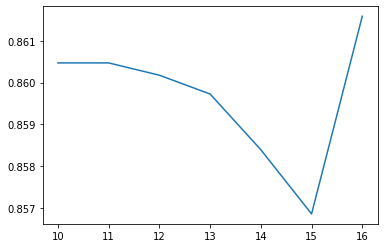

In [56]:
import matplotlib.pyplot as plt

x = [x for x in range(10,17)]

plt.plot(x, r2score_bkwd)
plt.show()
# Make sure to close the plt object once done
#plt.close()

In [57]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

features_selector_backward = sfs(LinearRegression(),
                k_features=16, 
                forward=False, 
                verbose=0, 
                scoring='neg_mean_squared_error')

features_selector_backward.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(16, 16),
                          scoring='neg_mean_squared_error')

In [58]:
features_selector_backward.k_feature_names_

('Menu Type',
 'Menu Category',
 'Menu Item',
 'Size Type',
 'Per Serving Size',
 'Total Fat Calories (cal)',
 'Total Fats (g)',
 'Saturated Fats (g)',
 'Non-Saturated Fats (g)',
 'Trans Fats (g)',
 'Cholesterol (mg)',
 'Sodium (g)',
 'Carbohydrates (g)',
 'Dietary Fiber (g)',
 'Sugar (g)',
 'Protein (g)')

In [59]:
X_train_bkwd = x_train[list(features_selector_backward.k_feature_names_)]
X_train_bkwd.shape

(68, 16)

In [60]:
model_bkwd = LinearRegression().fit(X_train_bkwd,y_train)

In [61]:
X_test_bkwd = x_test[list(features_selector_backward.k_feature_names_)]

In [62]:
y_pred_bkwd = model_frwd.predict(X_test_bkwd)
    
rmse = np.sqrt(mean_squared_error(y_test,y_pred_bkwd))
r2score = r2_score(y_test, y_pred_bkwd)

print('RMSE = ', rmse)
print('R2 score = ', r2score)

RMSE =  83.79720256799278
R2 score =  0.6105329583477983


### PCA

### Next i used pca to reduce dimensioanality reduction by keeping 95% variance

In [63]:
from sklearn.decomposition import PCA

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((68, 16), (34, 16), (68, 1), (34, 1))

In [65]:
pca = PCA(0.95)

X_train_pca = pca.fit_transform(X_train)

principalDf = pd.DataFrame(data = X_train_pca)
principalDf

,0,1,2
0,666.380517,73.582557,-63.388184
1,-177.285798,36.902033,37.719082
2,20.760811,-18.094103,-38.894837
3,-126.569355,-43.164647,-21.045858
4,-187.529996,-11.467036,15.325786
...,...,...,...
63,-183.799649,-56.763876,-8.257259
64,133.191392,5.781994,-29.745542
65,135.153379,11.014854,-63.959313
66,294.598936,48.780044,-110.694788


In [66]:
X_test_pca = pca.transform(X_test)

principalDf = pd.DataFrame(data = X_test_pca)
principalDf

,0,1,2
0,-25.319958,126.887404,35.958608
1,-187.631085,-10.193778,16.018906
2,-190.955094,22.787008,36.548974
3,-101.369034,55.971168,22.745339
4,-85.577102,96.944879,39.216868
5,-59.747688,-29.185769,-36.246722
6,-0.118368,-13.355949,-37.021637
7,-116.263791,58.333741,29.524902
8,282.956947,-21.885102,-1.958905
9,411.967949,33.428051,-69.128866


### Applying linear regression

In [67]:
model_pca = LinearRegression().fit(X_train_pca,y_train)

In [68]:
y_pred_pca = model_pca.predict(X_test_pca)
    
rmse = np.sqrt(mean_squared_error(y_test,y_pred_pca))
r2score = r2_score(y_test, y_pred_pca)

print('RMSE = ', rmse)
print('R2 score = ', r2score)

RMSE =  56.08395287144336
R2 score =  0.8255427984278463


In [69]:
X.shape,y.shape

((102, 16), (102, 1))

### PCA shows significant improvement

### Ridge Lasso

### Next we apply Ridge and Lasso Regression with respecitive pentaly terms of each

In [70]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X[list(features_selector_forward.k_feature_names_)],y,test_size=0.33, random_state=42+i)

model = Ridge(alpha = 0.1)

#fit model
model_ridge = model.fit(X_train, y_train)

In [71]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

y_pred_ridge = model_ridge.predict(X_test)

print("MSE =", mse(y_pred_ridge, y_test))
print("MAE =", mae(y_pred_ridge, y_test))
print("R2 =", r2_score(y_pred_ridge, y_test))

MSE = 5315.525005639835
MAE = 39.76424113658539
R2 = 0.8380509230024142


In [72]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 0.01)

#fit model
model_lasso = model.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

print("MSE =", mse(y_pred_lasso, y_test))
print("MAE =", mae(y_pred_lasso, y_test))
print("R2 =", r2_score(y_pred_lasso, y_test))

MSE = 5322.897811367392
MAE = 39.755073190900596
R2 = 0.8379248605092736


C:\Users\sharv\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.024e+04, tolerance: 1.522e+02
  model = cd_fast.enet_coordinate_descent(


### Since pca and ridge both performed well but r2 score for ridge was better so we move forward with ridge and attempt resampling methods

### 4.5 : Resampling Methods

### Bootstrapping - Ridge

### To increase the sample size we use bootstrapping ( with repetion)

In [73]:
rmse_resampling = []
r2score_resampling = []

n_times = 10

## Performing bootstrapping
for i in range(n_times):
    
    X_train, X_test, y_train, y_test = train_test_split(X[list(features_selector_forward.k_feature_names_)],y,test_size=0.33, random_state=42+i)
    
    model = Ridge(alpha = 0.1)
    model_ridge = model.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_test) 
    
    #Measuring accuracy on Testing Data    
    rmse_resampling.append(np.sqrt(mse(y_test,y_pred)))
    r2score_resampling.append(r2_score(y_test, y_pred))
    
################################################
# Result of all bootstrapping trials
print('=============================================')

print("Mean RMSE = ", np.mean(rmse_resampling))
print("Mean R2  = ", np.mean(r2score_resampling))

Mean RMSE =  70.11833332906859
Mean R2  =  0.7151760573616885


### After performing bootstrapping on Ridge we find out there is no significant improvement

### Cross Validation - Ridge

### They work by splitting the dataset into multiple training and test sets and running the evaluation multiple times (without repetion and dataset size remains same)

In [75]:
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X[list(features_selector_forward.k_feature_names_)],y,test_size=0.33, random_state=42)
    
lg_resultant = cross_validate(Ridge(solver='lsqr'), 
                              X_train, 
                              y_train, 
                              cv=5,
                            return_train_score=True,)

print("Mean Training Score = ", lg_resultant['train_score'].mean())
print("Mean Testing Score = ", lg_resultant['test_score'].mean())

Mean Training Score =  0.9670944410761988
Mean Testing Score =  0.8379473959188342


### Good training accuracy and not so good testing accuracy which may be caused by slight  model overfitting

### Moving Beyond Linearity

### Polynomial Regression

In [76]:
X.shape,y.shape

((102, 16), (102, 1))

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

r2_scores_poly = []
mae_scores = []  
for i in range(1,5):  
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

    poly = PolynomialFeatures(degree = i)
    X_train = poly.fit_transform(X_train)
    X_test = poly.fit_transform(X_test)


    poly.fit(X_train, y_train)
    linReg = LinearRegression()
    linReg.fit(X_train, y_train)

    y_pred = linReg.predict(X_test)
    print("for degree : {}".format(i))
    print("MAE : ", mae(y_test, y_pred))
    print("R2 Score : ", r2_score(y_test, y_pred))
    mae_scores.append(mae(y_test, y_pred))
    r2_scores_poly.append(r2_score(y_test, y_pred))

for degree : 1
MAE :  45.960238423940744
R2 Score :  0.6105329583477966
for degree : 2
MAE :  669.7881125097578
R2 Score :  -118.74077278657711
for degree : 3
MAE :  29870.318641159014
R2 Score :  -378345.1943587214
for degree : 4
MAE :  2616.9028437189986
R2 Score :  -2334.7141669082735


### We can clearly see from above that linear methods work better since my data set is follows a linear path it is very obvious that accuracy for polynomial regression will not be good.

### Ridge Regression gives the best results among all models to predict total calories.

### Conclusion

#### The dataset and the macro and micronutrients showed interesting results.
#### •	Means of saturated fats and trans fats are equal.
#### •	Means of total calories and Trans-fat are not equal.
#### •	F test showed means of the sample are different
#### •	Sufficient evidence to say that there is an association between Menu Category and Size Type preference.
#### •	Ridge Regression was the best machine learning model to predict total calories.
####  This research paper provides an effective alternative for people looking to adopt a healthier lifestyle by showing them how to test their own favourite food company that they consider healthy but might not be a healthy option.
#### By leveraging machine learning algorithms, the system provides accurate and personalized recommendations that can help individuals make informed decisions about their diet and overall health and not have to rely on third party apps for calorie intake always.
#### There is still a lot of improvement which can be done to the models to get better results in future.


### References
#### Mathematical Statistics and Data Analysis.
#### J. Rice. Belmont, CA: Duxbury Press., Third edition, (2006)
